# Datasets : Political Advertisements from Facebook
    
####    1.  [Facebook dataset](https://www.kaggle.com/datasets/mrmorj/political-advertisements-from-facebook)

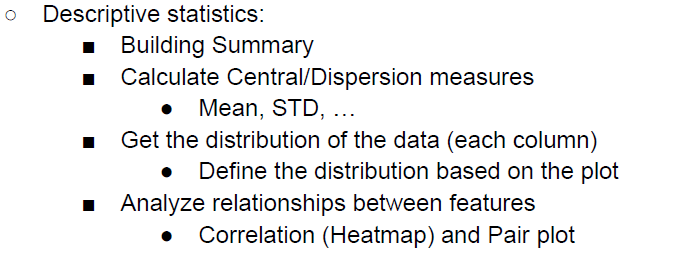

#### About Dataset

This database, updated daily, contains ads that ran on Facebook and were submitted by thousands of ProPublica users from around the world. We asked our readers to install browser extensions that automatically collected advertisements on their Facebook pages and sent them to our servers. We then used a machine learning classifier to identify which ads were likely political and included them in this dataset.

##### Features of the dataset 
- Ad ID: A unique identifier for each Facebook ad post.
- HTML: The HTML content of the ad post, which includes images and text.
- Political: A binary indicator (0 or 1) that denotes whether the ad is political or not.
- Not Political: A binary indicator (0 or 1) that denotes whether the ad is not political.
- Title: The title or headline of the ad post.
- Message: The main text content of the ad post.
- Thumbnail: The URL or link to a thumbnail image associated with the ad post.
- Created at: The date and time when the ad post was created (in UTC).
- Updated at: The date and time when the ad post was last updated (in UTC).
- Language: The language of the ad post.
- Images: The URL or link to the main image associated with the ad post.
- Impressions: The number of times the ad post was displayed to users.
- Political Probability: The probability that the ad post is political.
- Targeting: Information about the specific audience targeting for the ad post.
- Suppressed: A binary indicator (0 or 1) that denotes whether the ad post was suppressed.
- Targets: Information about the specific targets of the ad post.
- Advertiser: The name or entity that placed the ad post.
- Entities: Any labeled entities mentioned in the ad post (e.g., organizations, people).
- Page: The Facebook page associated with the ad post.
- Lower Page: The lower case version of the Facebook page associated with the ad post.
- Targetings: Additional information about the targeting of the ad post.
- Paid for by: The entity or organization that paid for the ad post.
- Targetedness: A measure of how targeted the ad post is.
- Listbuilding Fundraising Probability: Probability indicating if the ad post is related to listbuilding fundraising.

In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fbpac-ads-en-US.csv')
data 

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162319,23843108782710078,"<div class=""_5pcr userContentWrapper""><div cla...",12,0,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-19 10:31:52.466563+00,2018-10-22 11:40:06.24382+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Keep Them Accountable,"[{""entity"": ""Katko"", ""entity_type"": ""Person""}]",https://www.facebook.com/KeepThemAccountable18/,https://www.facebook.com/keepthemaccountable18/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...","HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",7.0,0.116965
162320,23843034525850259,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-24 20:41:42.111865+00,2018-10-24 20:41:42.111865+00,en-US,...,f,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",National Republican Congressional Committee,"[{""entity"": ""Illinois"", ""entity_type"": ""Region...",https://www.facebook.com/NRCC/,https://www.facebook.com/nrcc/,"{""<div><d

In [3]:
data.columns

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')

# Descriptive statistics:
## Building Summary 


In [6]:
description= data.describe()
description

,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba
count,162324.000000,162324.000000,162324.000000,162324.000000,112747.000000,152394.000000
mean,4.177663,0.794214,4.605049,0.928099,3.939723,0.545964
std,10.574403,2.770883,40.689815,0.169513,1.758957,0.333821
min,0.000000,0.000000,0.000000,0.000079,0.000000,0.000091
25%,0.000000,0.000000,1.000000,0.951812,3.000000,0.265190
50%,1.000000,0.000000,1.000000,0.997825,4.000000,0.423612
75%,4.000000,1.000000,2.000000,0.999978,4.000000,0.999893
max,488.000000,330.000000,3575.000000,1.000000,12.000000,1.230622


In [4]:
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

In [5]:
# Checking the missing values in each coulmn

missing_values = data.isnull().sum()
print(missing_values)

id                                    0
html                                  0
political                             0
not_political                         0
title                                18
message                               0
thumbnail                             0
created_at                            0
updated_at                            0
lang                                  0
images                                0
impressions                           0
political_probability                 0
targeting                         46258
suppressed                            0
targets                            4207
advertiser                        37711
entities                           3666
page                               2560
lower_page                         2560
targetings                        48262
paid_for_by                       50279
targetedness                      49577
listbuilding_fundraising_proba     9930
dtype: int64


## Calculate Central/Dispersion measures
-  Mean, STD, …

In [7]:
selected_columns = ['political', 'not_political']
selected_data = data[selected_columns]

In [8]:
selected_data= round(selected_data.describe(), 2)
selected_data

,political,not_political
count,162324.00,162324.00
mean,4.18,0.79
std,10.57,2.77
min,0.00,0.00
25%,0.00,0.00
50%,1.00,0.00
75%,4.00,1.00
max,488.00,330.00


In [9]:
# Mean
mean = round(selected_data.mean(), 2)
mean

political        20353.97
not_political    20332.32
dtype: float64

In [10]:
# Median
median = round(selected_data.median(), 2)
median

political        4.09
not_political    0.90
dtype: float64

In [11]:
# satndard deviation
std = round(selected_data.std(), 2)
std

political        57364.81
not_political    57373.42
dtype: float64

In [12]:
# Variance

variance = round(selected_data.var(), 2)
variance

political        3.290721e+09
not_political    3.291709e+09
dtype: float64

In [13]:
# Quartiles

first_qurtile = selected_data.quantile(0.25)
third_qurtile = selected_data.quantile(0.75)

# Interquartile Range
iqr = third_qurtile - first_qurtile

print("First Qurtile: ")
print(first_qurtile)
print()
print("Third Qurtile: ")
print(third_qurtile)

print()

print("Inter-quartile range: ")
print(iqr)

First Qurtile: 
political        0.75
not_political    0.00
Name: 0.25, dtype: float64

Third Qurtile: 
political        129.9275
not_political     84.5775
Name: 0.75, dtype: float64

Inter-quartile range: 
political        129.1775
not_political     84.5775
dtype: float64


In [14]:
# Range values
range_values = selected_data.max() - selected_data.min()
range_values

political        162324.0
not_political    162324.0
dtype: float64

## Get the distribution of the data (each column)
- Define the distribution based on the plot

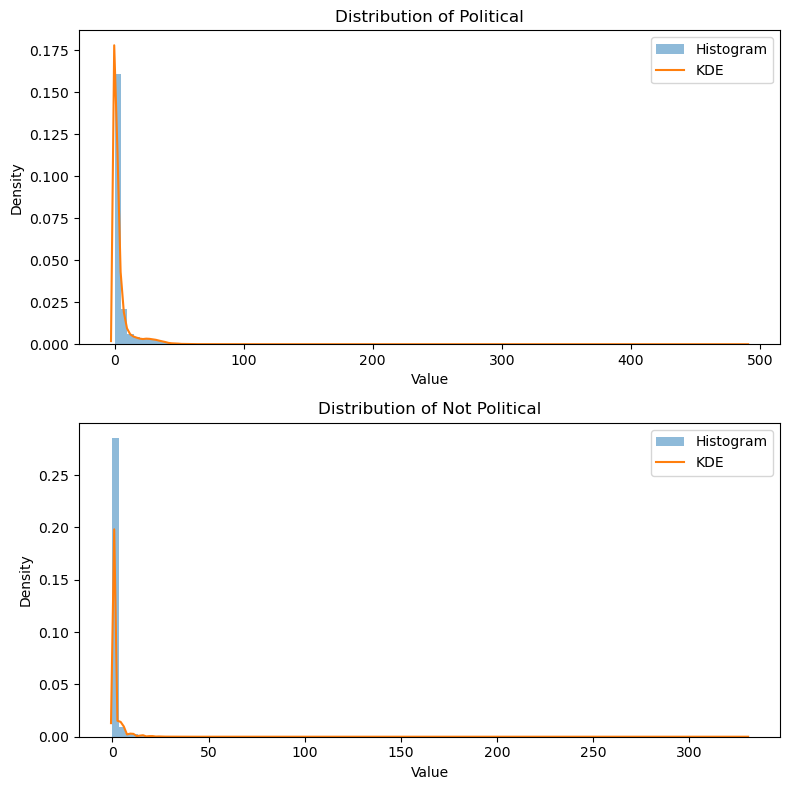

In [15]:
# Extract the 'political' and 'not_political' columns 
political_data = data['political'].values
not_political_data = data['not_political'].values

# Removing NaN values from the data
political_data = political_data[~np.isnan(political_data)]
not_political_data = not_political_data[~np.isnan(not_political_data)]

# Creating subplots for histograms and KDE plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# the 'political' column
ax1.hist(political_data, bins=100, density=True, alpha=0.5, label='Histogram')
sns.kdeplot(political_data, ax=ax1, label='KDE')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Political')
ax1.legend()

# the 'not_political' column
ax2.hist(not_political_data, bins=100, density=True, alpha=0.5, label='Histogram')
sns.kdeplot(not_political_data, ax=ax2, label='KDE')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of Not Political')
ax2.legend()


fig.tight_layout()
plt.show()

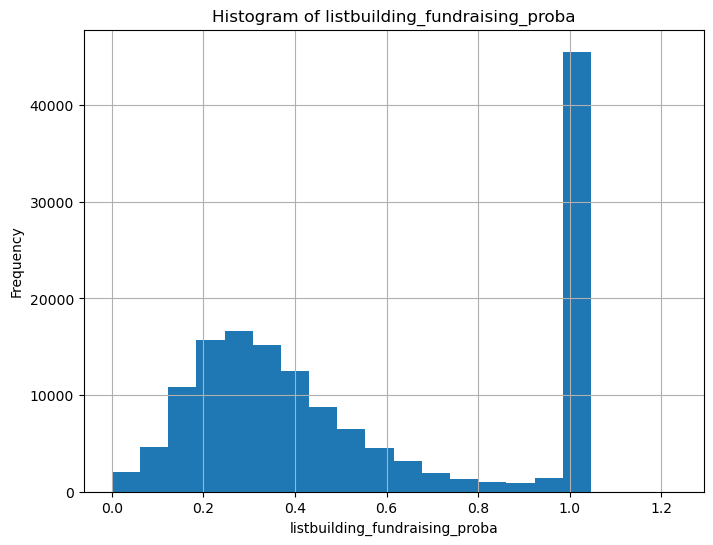

In [16]:
# Extracting the 'listbuilding_fundraising_proba' column and removing NaN values
column_data = data['listbuilding_fundraising_proba'].dropna()

# Ploting the histogram
plt.figure(figsize=(8, 6))
plt.hist(column_data, bins=20)
plt.xlabel('listbuilding_fundraising_proba')
plt.ylabel('Frequency')
plt.title('Histogram of listbuilding_fundraising_proba')
plt.grid(True)
plt.show()

#### Analyze relationships between features
- Correlation (Heatmap) and Pair plot

In [17]:
data.corr()

C:\Users\35840\AppData\Local\Temp\ipykernel_9480\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba
political,1.000000,0.267615,-0.004525,0.113638,0.049682,-0.099580
not_political,0.267615,1.000000,0.008487,-0.013219,-0.040422,0.018845
impressions,-0.004525,0.008487,1.000000,0.009100,-0.015223,0.011552
political_probability,0.113638,-0.013219,0.009100,1.000000,0.016359,0.050328
targetedness,0.049682,-0.040422,-0.015223,0.016359,1.000000,-0.205439
listbuilding_fundraising_proba,-0.099580,0.018845,0.011552,0.050328,-0.205439,1.000000


C:\Users\35840\AppData\Local\Temp\ipykernel_9480\425853349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


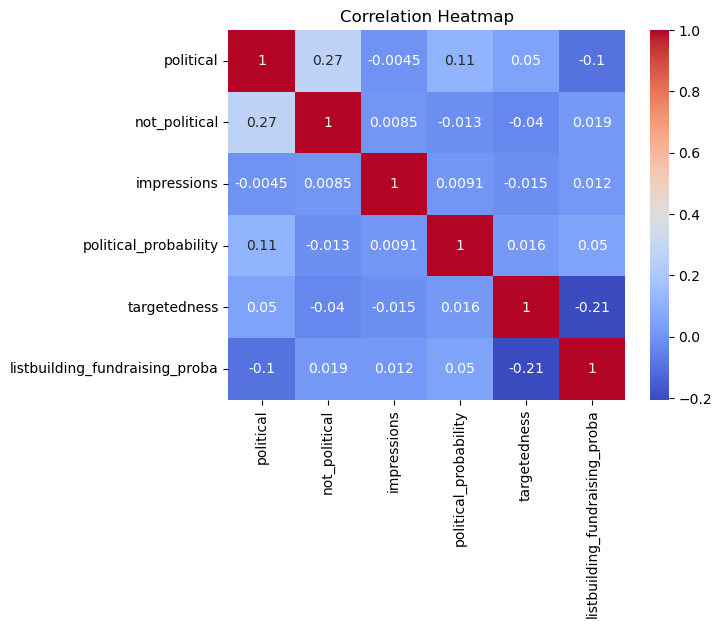

In [18]:
# The correlation matrix
correlation_matrix = data.corr()

# The heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
selected_columns = ['political', 'not_political']
selected_column = data[selected_columns].describe()
selected_column

,political,not_political
count,162324.000000,162324.000000
mean,4.177663,0.794214
std,10.574403,2.770883
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,1.000000
max,488.000000,330.000000


In [20]:
corre_selected_col=selected_column.corr()
corre_selected_col

,political,not_political
political,1.0,1.0
not_political,1.0,1.0


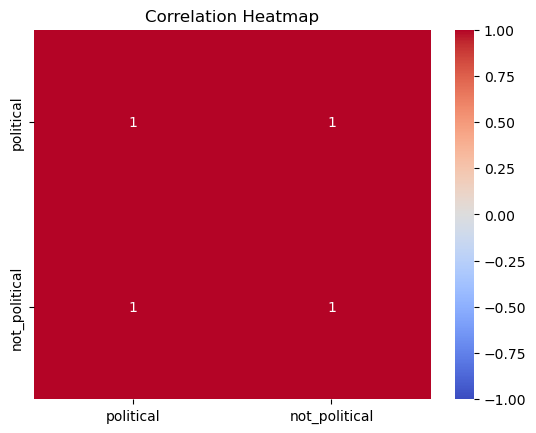

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the desired minimum and maximum values for color mapping
vmin = -1  # Minimum correlation value
vmax = 1   # Maximum correlation value

sns.heatmap(corre_selected_col, annot=True, cmap="coolwarm", vmin=vmin, vmax=vmax)
plt.title("Correlation Heatmap")
plt.show()

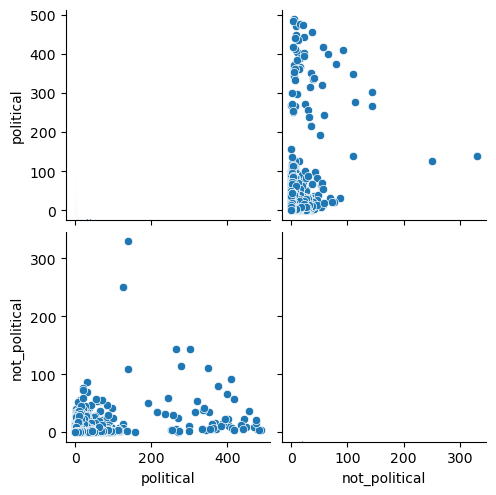

In [22]:
# Pair plot

# Selecting the numeric columns for the pair plot('political', 'not_political')
numeric_columns = ['political', 'not_political']

sns.pairplot(data[numeric_columns])
plt.show()

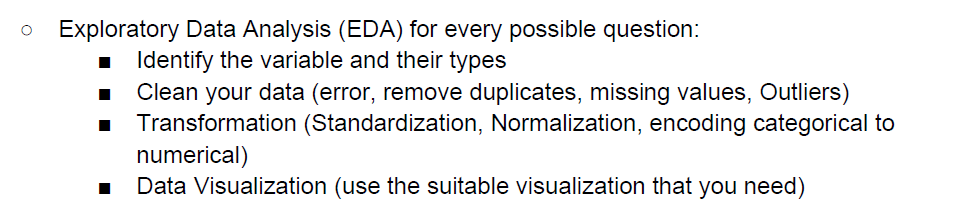

In [23]:
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

From the output, we can observe the variable names (column names) on the left side, and their respective data types on the right side. In this example, the dataset has columns with data types such as object, int64, and float64, representing categorical, integer, and floating-point variables, respectively.

## Clean your data(error, remove duplicates, missing values, outliers)

In [24]:
has_errors = False
print("Errors in DataFrame:")
for column in data.columns:
    try:
        # Checking for missing values in the column
        if data[column].isnull().any():
            has_errors = True
            print("Error: Missing values found in column:", column)
            print(data[data[column].isnull()])

        # Checking for out-of-range errors
        errors = data[(data[column] < data[column].min()) | (data[column] > data[column].max())]
        if not errors.empty:
            has_errors = True
            print("Errors found in column:", column)
            print(errors)

    except TypeError:
        print("Error: Non-numeric values found in column:", column)
        has_errors = True

if not has_errors:
    print("No errors found in DataFrame")


Errors in DataFrame:
Error: Missing values found in column: title
                       id                                               html  \
37688   23842661347750256  <div class="ego_unit" id="u_4g_0"><div class="...   
38523       6075458619778  <div class="ego_unit" id="u_ps_0_8_1"><div id=...   
42962   23842671328900498  <div class="ego_unit" id="u_ps_0_8_0"><div cla...   
42983   23842670619920498  <div id="u_ps_0_8_0" class="ego_unit"><div id=...   
43154   23842663534330498  <div class="ego_unit" id="u_ps_0_8_0"><div cla...   
46929   23842661349790256  <div id="u_ps_0_a_0" class="ego_unit"><div cla...   
48013       6072942441178  <div id="u_ps_0_8_1" class="ego_unit"><div id=...   
49560       6077163574981  <div class="ego_unit" id="u_is_1"><div id="607...   
51135       6077164527181  <div class="ego_unit" id="u_1i_0"><div id="607...   
56267   23842663533510498  <div id="u_27_9" class="ego_unit"><div id="238...   
56885       6077339439581  <div id="u_52_0" class="ego

Error: Missing values found in column: targeting
                                                id  \
0       hyperfeed_story_id_5c9baa3ee0ec08073500042   
1       hyperfeed_story_id_5c9bb2a2413852086735771   
2       hyperfeed_story_id_5c9bb4fa461731e29426627   
4       hyperfeed_story_id_5c9bb059454851c17741213   
5       hyperfeed_story_id_5c9ba790386328104458863   
...                                            ...   
162306  hyperfeed_story_id_5c95055b8a3d61351609218   
162307  hyperfeed_story_id_5ccdf128344c32196461526   
162313  hyperfeed_story_id_5ccdf3ba5ed3e4f43734987   
162315                           23842649872210034   
162322  hyperfeed_story_id_5c8b16b11b8f86515960964   

                                                     html  political  \
0       <div class="_5pa- userContentWrapper"><div cla...          0   
1       <div class="_5pa- userContentWrapper"><div cla...          0   
2       <div class="_5pa- userContentWrapper"><div cla...          0   
4       <div c

                       id                                               html  \
66          6084054470175  <div id="u_56_0" class="ego_unit"><div id="608...   
103         6098901396186  <div class="ego_unit" id="u_ps_fetchstream_3_6...   
457     23842704216270425  <div id="u_ps_0_9_0" class="ego_unit"><div cla...   
649     23842736927590544  <div class="ego_unit" id="u_ps_0_7_0"><div cla...   
895     23842740116630014  <div class="ego_unit" id="u_al_0"><div class="...   
...                   ...                                                ...   
162194  23842817134120681  <div class="ego_unit" id="u_ps_0_6_0"><div cla...   
162201      6083171658932  <div class="ego_unit" id="u_4g_0"><div class="...   
162238      6094242546995  <div class="ego_unit" id="u_zj_0"><div class="...   
162266  23842759553710409  <div class="ego_unit" id="u_ps_0_6_0"><div cla...   
162268      6079056554081  <div class="ego_unit" id="u_3p_3"><div class="...   

        political  not_political  \
66 

                                                id  \
0       hyperfeed_story_id_5c9baa3ee0ec08073500042   
1       hyperfeed_story_id_5c9bb2a2413852086735771   
2       hyperfeed_story_id_5c9bb4fa461731e29426627   
4       hyperfeed_story_id_5c9bb059454851c17741213   
5       hyperfeed_story_id_5c9ba790386328104458863   
...                                            ...   
162306  hyperfeed_story_id_5c95055b8a3d61351609218   
162307  hyperfeed_story_id_5ccdf128344c32196461526   
162313  hyperfeed_story_id_5ccdf3ba5ed3e4f43734987   
162315                           23842649872210034   
162322  hyperfeed_story_id_5c8b16b11b8f86515960964   

                                                     html  political  \
0       <div class="_5pa- userContentWrapper"><div cla...          0   
1       <div class="_5pa- userContentWrapper"><div cla...          0   
2       <div class="_5pa- userContentWrapper"><div cla...          0   
4       <div class="_5pa- userContentWrapper"><div cla...      

### Finding outliers using IQR and visualize using Boxplot for political and non-political column

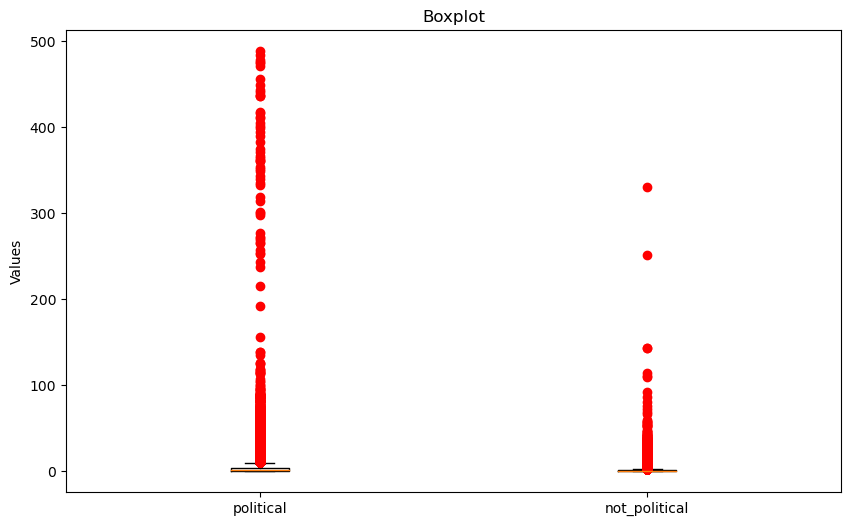

In [25]:
plt.figure(figsize=(10, 6))

# Selecting the numeric columns for analysis
numeric_columns = data[['political', 'not_political']]

# Creating boxplots for the selected columns
bp = plt.boxplot(numeric_columns.values, showfliers=False)

# Setting plot title, x-axis ticks, and y-axis label
plt.title('Boxplot')
plt.xticks(range(1, len(numeric_columns.columns) + 1), numeric_columns.columns)
plt.ylabel('Values')

# Finding the outliers
for j, column in enumerate(numeric_columns.columns, 1):
    column_values = numeric_columns[column].values
    q1 = np.nanpercentile(column_values, 25)
    q3 = np.nanpercentile(column_values, 75)
    iqr = q3 - q1
    outlier_threshold = 1.5 * iqr
    column_outliers = column_values[((column_values < q1 - outlier_threshold) | (column_values > q3 + outlier_threshold))]
    for outlier in column_outliers:
        plt.plot(j, outlier, 'ro', label='Outlier')

plt.show()


# Normality test for detecting outliers

In [26]:

def detect_outliers(data, column_name, threshold=1.5):
    column_data = data[column_name]
    outliers = None

    if pd.api.types.is_numeric_dtype(column_data):
        alpha = 0.05
        stat, p = stats.shapiro(column_data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(column_data))
            column_outliers = column_data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(column_data, 25)
            q3 = np.percentile(column_data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

        if column_outliers is not None:
            outliers = pd.DataFrame({column_name: column_outliers})

    return outliers

E:\Jupyter notebook\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\Jupyter notebook\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


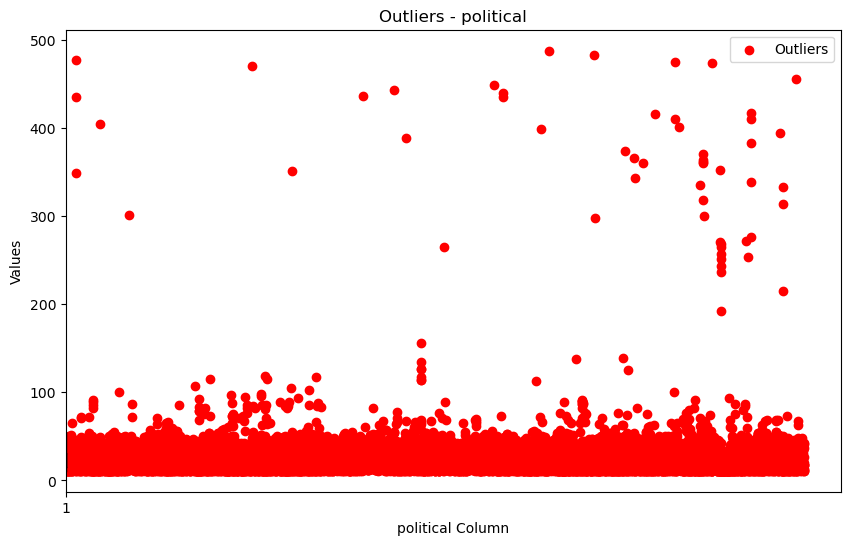

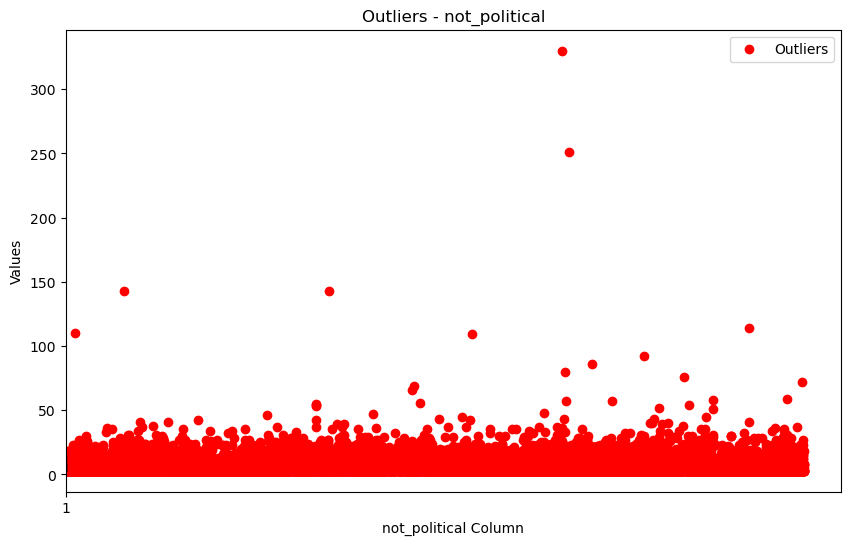

In [27]:
def visualize_outliers(outliers, column_name):
    if outliers is not None:
        plt.figure(figsize=(10, 6))
        plt.boxplot(outliers.values, showfliers=False)
        plt.scatter(range(1, len(outliers) + 1), outliers.values, color='red', marker='o', label='Outliers')
        plt.xlabel(f'{column_name} Column')
        plt.ylabel('Values')
        plt.title(f'Outliers - {column_name}')
        plt.legend()
        plt.show()
    else:
        print('No outliers detected.')

# Detecting outliers for each column
outliers_political = detect_outliers(data, 'political')
outliers_not_political = detect_outliers(data, 'not_political')

# Visualizing outliers for each column
visualize_outliers(outliers_political, 'political')
visualize_outliers(outliers_not_political, 'not_political')

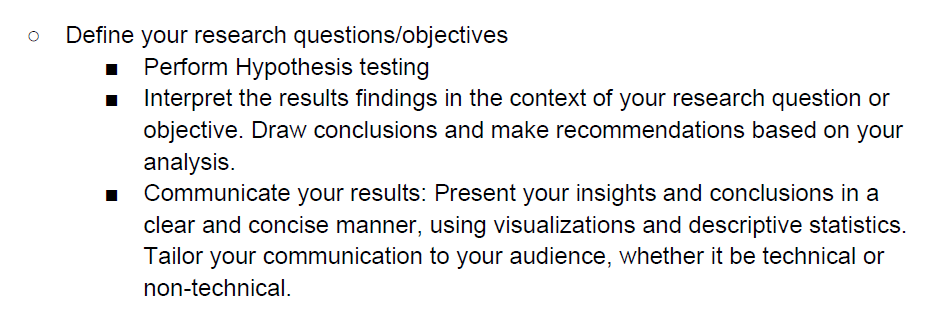

## Research question 1:

In [28]:
selected_columns = ['political', 'not_political']
selected_data = data[selected_columns]

# Performing the two-sample t-test
t_statistic, p_value = stats.ttest_ind(selected_data['political'], selected_data['not_political'])

alpha = 0.05

print("P value: ",p_value)


if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean values of 'political' and 'not_political' ads.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean values of 'political' and 'not_political' ads.")


P value:  0.0
Reject the null hypothesis. There is a significant difference in the mean values of 'political' and 'not_political' ads.


Based on the analysis of the selected dataset and performing a two-sample t-test, it can be concluded that there is a statistically significant difference in the mean values of the 'political' and 'not_political' ads. The obtained p-value is below the significance level of 0.05, indicating that we can reject the null hypothesis and infer that there is indeed a significant difference in the mean values of these two ad categories.

For future modeling purposes, I would recommend using logistic regression. Logistic regression is well-suited for binary classification tasks, such as predicting whether an ad is political or not. It provides interpretability and can effectively predict the category based on relevant factors. To validate the logistic regression model's performance, metrics such as training score, validation score, and ROC AUC score can be assessed. These metrics provide insights into the model's performance, generalization ability, and class discrimination.

# Annex

### Analysis of "images"  column

In [22]:
# the number of images
image_count = data['images'].str.count('{.*?}').sum()

print("Total number of images:", image_count)

Total number of images: 162324


In [23]:
# the image links from the "images" column
image_links = data['images'].str.extract(r'\{(.*?)\}')

# the image links
for link in image_links[0].head(10):
    print(link)

https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/spS444/c1.0.1198.628a/s526x296/55844308_6127288747297_3018113389080608768_n.png.jpg
https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/spS444/p180x540/55863114_23843220221260433_8886009863356809216_n.png.jpg
https://pp-facebook-ads.s3.amazonaws.com/v/t15.13418-10/53741229_258330641784015_6339888306087526400_n.jpg,https://pp-facebook-ads.s3.amazonaws.com/v/t15.13418-10/53741229_258330641784015_6339888306087526400_n.jpg,https://pp-facebook-ads.s3.amazonaws.com/rsrc.php/v3/y4/r/-PAXP-deijE.gif,https://pp-facebook-ads.s3.amazonaws.com/rsrc.php/v3/yt/r/wPe6V5iq-og.png,https://pp-facebook-ads.s3.amazonaws.com/rsrc.php/v3/yt/r/wPe6V5iq-og.png
https://pp-facebook-ads.s3.amazonaws.com/v/t45.1600-4/cp0/q90/spS444/p180x540/49331592_23843377427170360_6166817401984778240_n.png.jpg
https://pp-facebook-ads.s3.amazonaws.com/v/t15.5256-10/53268840_2871830482957659_5218378697635004416_n.jpg,https://pp-facebook-ads.s3.amazonaws.com/

### Displaying images

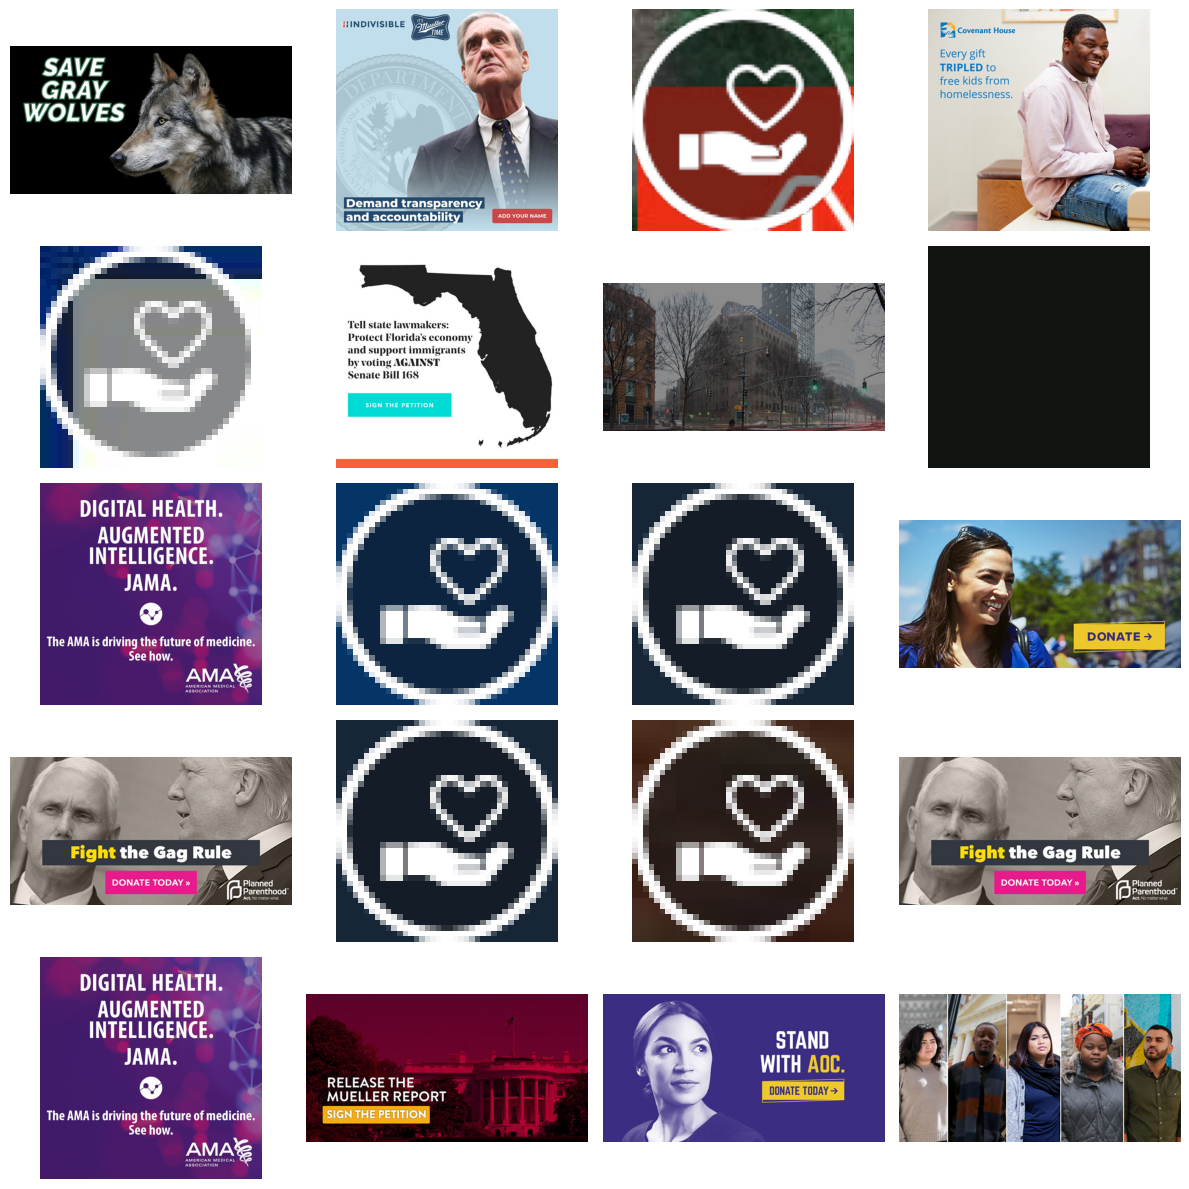

In [31]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
import io
import re


# Extracting the image links from the "images" column
image_links = data['images'].str.extractall(r'\{(.*?)\}')[0].tolist()[:24]

# Creating a subplot grid with 5 rows and 4 columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))

# Loop through the image links and display the images
for i, links in enumerate(image_links):
    # Spliting the links if there are multiple separated by commas
    links = links.split(',')

    for link in links:
        link = link.strip()  # Removing any leading/trailing whitespace

        try:
            # Sending a request to download the image
            response = requests.get(link)

            # Opening the image using PIL
            img = Image.open(io.BytesIO(response.content))

            ax = axes[i // 4, i % 4]
            ax.imshow(img)
            ax.axis('off')

        except:
            # If there's an error in opening the image, continue to the next link
            continue


plt.tight_layout()
plt.show()

### Downloading the images

In [32]:
import requests
from PIL import Image
import io
import os

political_probabilities = data['political_probability']

# Creating a folder to save the images
folder_name = 'political_probability_images'
os.makedirs(folder_name, exist_ok=True)

# Loop through the image links and political probabilities
for i, (link, probability) in enumerate(zip(image_links, political_probabilities)):
    if isinstance(link, float):
        continue
    
  
    links = link.split(',')

    for j, link in enumerate(links):
        link = link.strip()  

        try:            
            response = requests.get(link)            
            img = Image.open(io.BytesIO(response.content))            
            prefix = 'political' if probability >= 0.5 else 'not_political'           
            extension = os.path.splitext(link)[1].lower()           
            new_filename = f"{prefix}_{i+1}_{j+1}{extension}"          
            save_path = os.path.join(folder_name, new_filename)
            img.save(save_path)

        except:
           
            continue


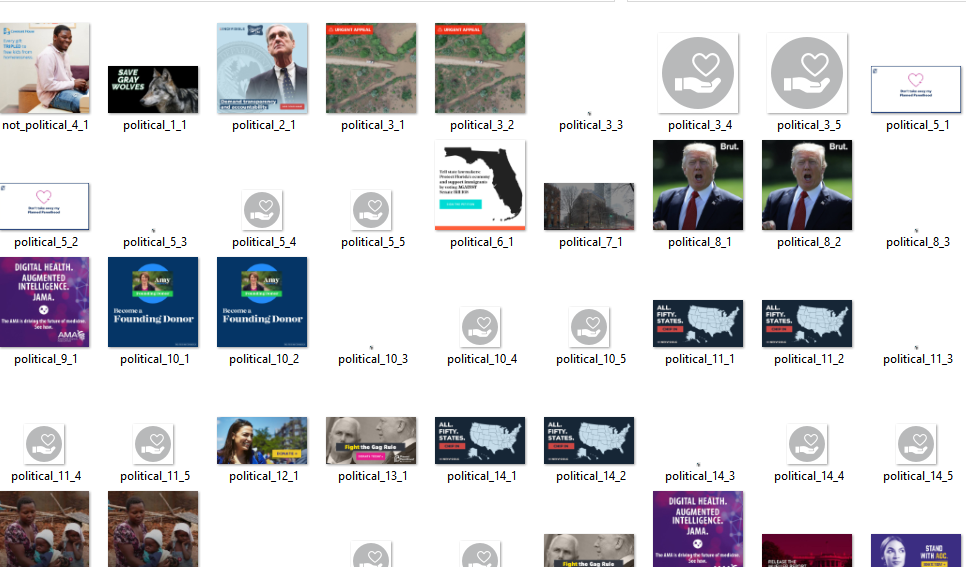

#### Plotting the number of political and non-political images

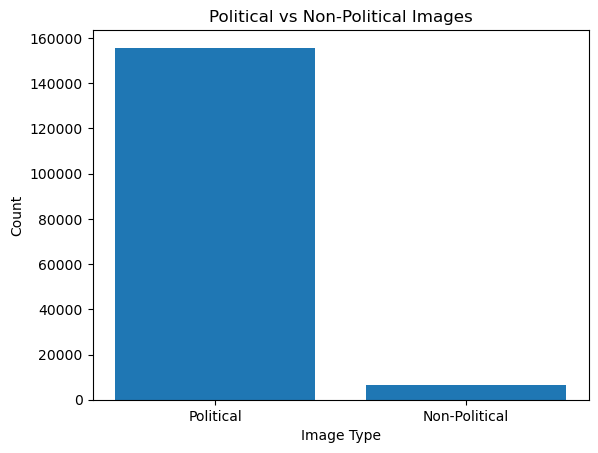

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# the number of political and non-political images
political_count = data[data['political_probability'] >= 0.5]['political_probability'].count()
non_political_count = data[data['political_probability'] < 0.5]['political_probability'].count()

# a bar plot
labels = ['Political', 'Non-Political']
counts = [political_count, non_political_count]

plt.bar(labels, counts)

plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Political vs Non-Political Images')

plt.show()

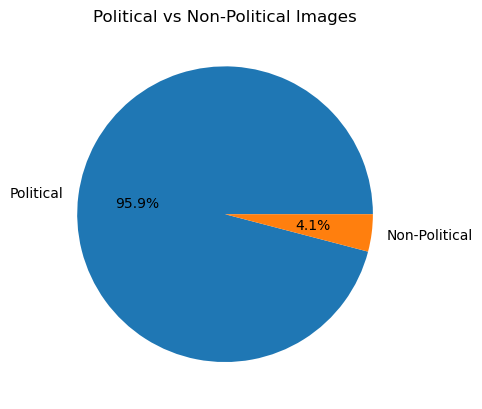

In [27]:
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Political vs Non-Political Images')

plt.show()

## Analysis of 'created_at' and 'updated_at' columns

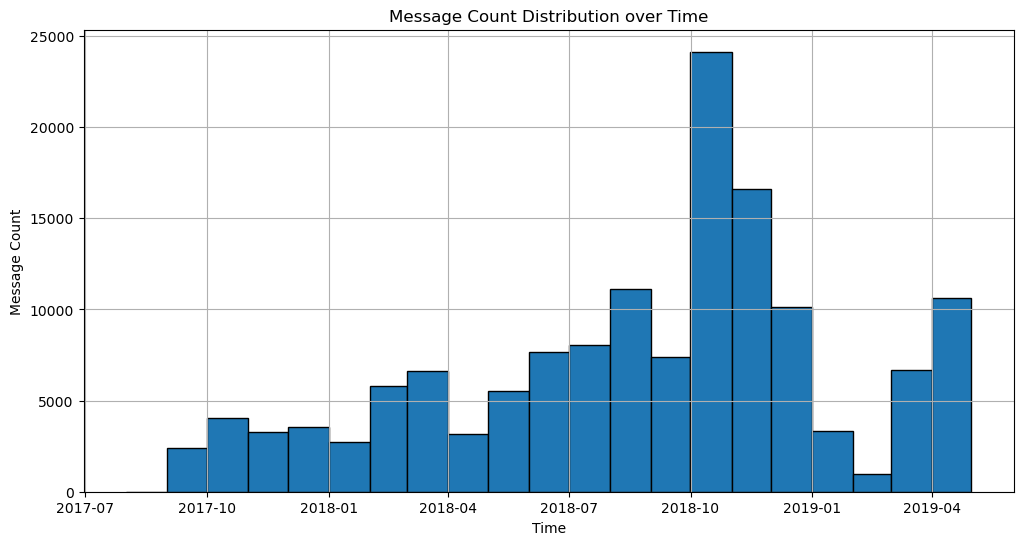

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# Setting the figure size
plt.figure(figsize=(12, 6))

# Setting the time interval for the histogram
time_interval = '1M'

# Creating a histogram of message counts based on created_at column
data['created_at'].hist(bins=pd.date_range(start=data['created_at'].min(), end=data['created_at'].max(), freq=time_interval), edgecolor='black')

# Setting the plot title and labels
plt.title('Message Count Distribution over Time')
plt.xlabel('Time')
plt.ylabel('Message Count')
plt.show()

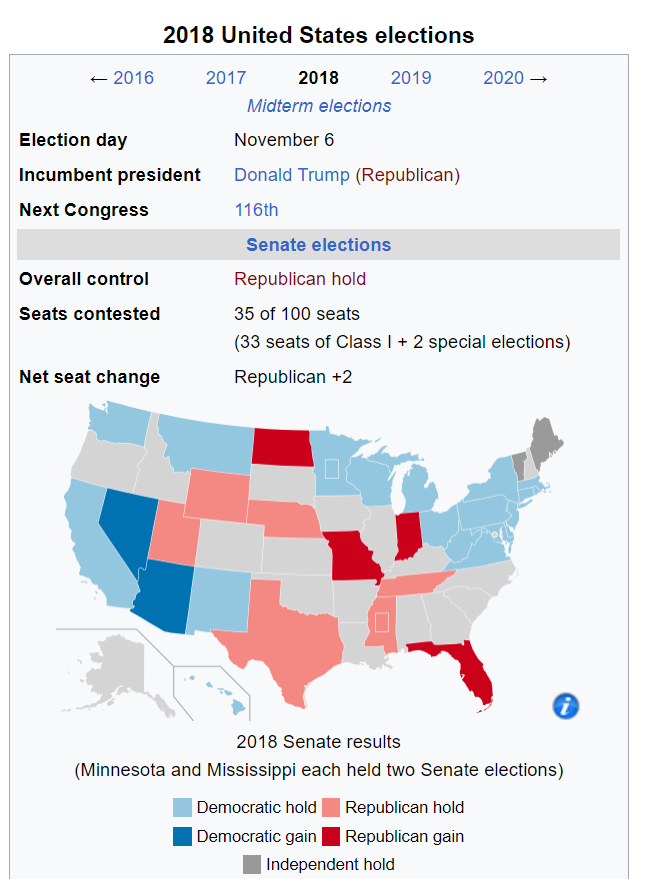

https://en.wikipedia.org/wiki/2018_United_States_elections

## Analysis of message column

In [20]:
import re
import pycountry
import pandas as pd

# Removing HTML tags from the messages
data['clean_message'] = data['message'].str.replace(r'<.*?>', '', regex=True)

# Extracting country names using regular expressions
pattern = r'\b[A-Z][a-zA-Z]*(?:\s[A-Z][a-zA-Z]*)*\b'
data['countries_mentioned'] = data['clean_message'].apply(lambda x: re.findall(pattern, x))

# Extracting valid country names using pycountry
valid_countries = []
for countries in data['countries_mentioned']:
    for country in countries:
        try:
            # validating the country name using pycountry
            country_info = pycountry.countries.get(name=country)
            if country_info:
                valid_countries.append(country_info.name)
        except LookupError:
            pass

# the number of unique countries mentioned
num_unique_countries = len(set(valid_countries))
print("Number of unique countries mentioned:", num_unique_countries)

# the names of the first 20 countries
first_20_countries = list(set(valid_countries))[:10]
for country in first_20_countries:
    print(country)

Number of unique countries mentioned: 119
Sri Lanka
Netherlands
Tajikistan
Malaysia
India
Norway
South Africa
Pakistan
Austria
Kenya
